# Análise de dados socioeconômicos do Enem
#### O Enem é um vestibular de nível nacional composto por 4 provas diferentes que ocorre em dois dias, sendo no dia 1: Ciências humanas e redação. No dia 2: Ciências da natureza e matemática. O dia 1 é composto por 90 questões + redação e o dia 2 é composto por 90 questões, somente. Nesse projeto iremos explorar os dados referentes aos dois dias de prova.
#### O Enem é um dia muito esperado para os alunos do terceiro ano do ensino médio e para aqueles que ainda não ingressaram em uma faculdade pública. Para este dia, os alunos e instituições de ensino elaboram estratégias para obter um melhor desempenho nas provas, como por exemplo, ao saber que redação possui uma nota máxima de 1000 e é a única disciplina que é possível tirar essa nota, eles decidem dedicar mais tempo para adquirir uma excelente nota, afim de ter mais chances para atingir seu objetivo. Matemática também é uma das disciplinas que mais pesam na nota final, e por isso também é exigido uma maior dedicação para o estudo dessa matéria.

## Objetivos
### 1. A renda dos participante está ligada sua nota?
### 2. Seria possível encontrar uma associação das notas com a rede de ensino que um aluno estudou?
### 3. Há relação entre uma nota e outra?
### 4. Que região demográfica brasileira possui melhor desempenho? 
        - Que região apresenta melhor desempenho em redação?
        - Qual região apresenta melhor desempenho em matemática?
        - Região x média do dia 2 
### 5. A idade realmente importa para um bom desempenho dos participantes?

In [1]:
# Importação das biliotécas utilizadas.
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date 

#Evitando alertas
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df_enem = pd.read_excel("Dados_Enem_Econ.xlsx")

In [6]:
df_enem.shape

(9970, 9)

In [96]:
df_enem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9970 entries, 0 to 9969
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SG_UF_RESIDENCIA  9970 non-null   object 
 1   NU_IDADE          9970 non-null   int64  
 2   TP_ESCOLA         9970 non-null   int64  
 3   Q006              9970 non-null   object 
 4   NU_NOTA_CN        9970 non-null   float64
 5   NU_NOTA_CH        9970 non-null   float64
 6   NU_NOTA_LC        9970 non-null   float64
 7   NU_NOTA_MT        9970 non-null   float64
 8   NU_NOTA_REDACAO   9970 non-null   int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 701.1+ KB


### Respondendo a pergunta 1: A renda dos participantes está ligada a sua nota?
### A coluna de nome Q006 corresponde aos dados de renda de cad participante, cada letra se refere a um valor vejamos só o que quer dizer cada letra.
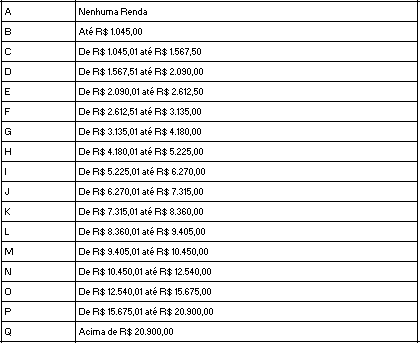

In [4]:
df_enem.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_ESCOLA,Q006,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,RJ,18,2,C,377.3,366.7,478.8,453.0,280
1,PE,18,2,B,375.8,465.8,531.9,386.1,600
2,SP,18,2,D,395.9,400.4,493.7,516.8,640
3,BA,18,3,K,712.9,711.7,665.5,731.5,940
4,BA,18,2,B,346.3,494.9,519.8,391.8,640


In [8]:
df_enem.describe()

,NU_IDADE,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,9970.000000,9970.000000,9970.000000,9970.000000,9970.000000,9970.000000,9970.000000
mean,17.717452,2.137111,476.110752,507.826429,520.288385,527.776299,588.860582
std,1.374614,0.343982,76.004605,80.285119,63.257290,108.320815,185.308330
min,14.000000,2.000000,0.000000,0.000000,0.000000,359.000000,0.000000
25%,17.000000,2.000000,415.300000,449.300000,483.300000,440.500000,500.000000
50%,18.000000,2.000000,469.300000,511.000000,526.100000,508.100000,600.000000
75%,18.000000,2.000000,532.600000,566.400000,564.500000,602.275000,700.000000
max,52.000000,3.000000,789.900000,755.500000,727.900000,985.000000,980.000000


### - Nesse momento irei descrever as principais medidas estatísticas de desempenho agrupado por grupo de renda. Acredito que desse modo já poderemos ver como as notas irão variar. Escolhi separar por dia de prova, sendo a primeira parte iremos analisar o dia 1, matérias de humanas. E no dia 2, irei analisar as matérias de exatas, vista por muitos como  uma matéria difícil.

In [73]:
df_enem.groupby('Q006')[['NU_NOTA_CH', 'NU_NOTA_LC']].describe()

NU_NOTA_CH                                                          \
          count        mean        std    min      25%     50%      75%   
Q006                                                                      
A         421.0  463.545368  72.009864    0.0  409.100  460.70  514.300   
B        2493.0  472.825351  69.857602    0.0  419.200  469.80  524.700   
C        2480.0  493.343669  73.705867    0.0  441.425  494.75  547.050   
D         874.0  513.959725  76.001688    0.0  464.225  519.65  567.850   
E         948.0  516.652848  71.908478  322.5  467.525  523.25  569.800   
F         391.0  534.303325  70.691999  335.0  485.950  539.70  585.800   
G         693.0  531.649351  70.216602  324.9  484.800  541.00  579.200   
H         415.0  540.919518  79.165990    0.0  496.850  546.90  598.200   
I         367.0  555.641962  71.516385  315.9  512.450  564.60  599.450   
J         167.0  558.038323  75.171454  362.0  515.400  569.30  611.750   
K         103.0  577.395146  71.844307  371.2  544.700  589.70  627.050   
L          84.0  575.380952  72.821051  343.2  535.325  585.90  619.500   
M          96.0  571.238542  82.931960  334.3  515.500  589.20  634.750   
N         116.0  582.065517  66.399187  354.0  548.500  594.35  628.625   
O         115.0  604.053043  65.732942  393.7  563.850  602.50  654.400   
P          84.0  615.073810  60.252893  427.0  584.950  616.55  655.650   
Q         123.0  621.208130  58.470736  370.1  592.050  632.70  661.150   

            NU_NOTA_LC                                                 \
        max      count        mean        std    min      25%     50%   
Q006                                                                    
A     646.5      421.0  481.014727  65.585001    0.0  443.900  485.20   
B     712.7     2493.0  489.411272  59.689492    0.0  452.300  495.50   
C     705.1     2480.0  510.539435  57.005181  326.1  477.000  515.75   
D     694.0      874.0  528.205378  58.216228    0.0  497.800  533.35   
E     704.0      948.0  528.071730  57.009029  331.6  496.675  535.80   
F     713.7      391.0  542.982864  51.076138  338.1  512.200  548.80   
G     713.9      693.0  542.014574  52.147748  348.2  513.500  547.90   
H     718.9      415.0  551.812771  53.884658  337.4  525.100  556.90   
I     753.3      367.0  557.751226  50.227088  341.1  530.750  563.60   
J     744.1      167.0  562.517964  48.724606  390.7  533.150  566.30   
K     711.7      103.0  572.160194  56.904354  393.4  544.650  582.40   
L     719.5       84.0  572.386905  48.389459  401.4  550.450  580.65   
M     716.1       96.0  572.555208  49.618150  414.2  547.075  576.70   
N     700.7      116.0  575.034483  47.292070  420.4  553.800  581.75   
O     755.5      115.0  590.313043  48.026205  442.4  566.700  590.60   
P     751.5       84.0  596.934524  38.838608  496.8  576.500  595.05   
Q     729.7      123.0  601.574797  38.171306  462.7  583.650  604.50   

                      
          75%    max  
Q006                  
A     526.000  625.9  
B     529.900  692.6  
C     552.500  660.0  
D     565.875  662.9  
E     566.825  696.7  
F     579.350  678.5  
G     577.600  670.1  
H     587.950  727.9  
I     589.600  694.8  
J     596.100  677.8  
K     609.400  671.9  
L     604.925  664.2  
M     604.225  688.2  
N     606.600  667.2  
O     621.000  710.2  
P     623.750  686.4  
Q     622.100  697.4

In [14]:
df_enem.groupby('Q006')[['NU_NOTA_REDACAO']].describe()

NU_NOTA_REDACAO                                                      \
               count        mean         std    min    25%    50%    75%   
Q006                                                                       
A              421.0  500.332542  188.601075    0.0  420.0  520.0  620.0   
B             2493.0  524.195748  183.233522    0.0  440.0  540.0  620.0   
C             2480.0  564.637097  176.900700    0.0  480.0  580.0  660.0   
D              874.0  600.480549  170.933017    0.0  520.0  600.0  700.0   
E              948.0  601.160338  162.587069    0.0  520.0  600.0  700.0   
F              391.0  629.104859  147.349112    0.0  560.0  620.0  720.0   
G              693.0  625.858586  170.672819    0.0  560.0  620.0  740.0   
H              415.0  654.313253  172.193712    0.0  560.0  660.0  780.0   
I              367.0  676.512262  170.652362    0.0  580.0  660.0  800.0   
J              167.0  700.000000  170.216022    0.0  600.0  680.0  830.0   
K              103.0  716.116505  160.588580    0.0  610.0  720.0  850.0   
L               84.0  719.047619  164.013069  220.0  600.0  750.0  860.0   
M               96.0  730.833333  179.306657    0.0  635.0  740.0  880.0   
N              116.0  742.068966  131.331093  280.0  640.0  740.0  840.0   
O              115.0  763.304348  141.345177  320.0  640.0  780.0  880.0   
P               84.0  777.857143  131.204535  340.0  695.0  800.0  880.0   
Q              123.0  800.975610  133.031579  360.0  740.0  840.0  910.0   

             
        max  
Q006         
A     940.0  
B     980.0  
C     980.0  
D     960.0  
E     980.0  
F     960.0  
G     980.0  
H     960.0  
I     980.0  
J     980.0  
K     960.0  
L     960.0  
M     980.0  
N     980.0  
O     980.0  
P     980.0  
Q     980.0

In [13]:
df_enem.groupby('Q006')[['NU_NOTA_MT', 'NU_NOTA_CN']].describe()

NU_NOTA_MT                                                           \
          count        mean         std    min      25%     50%      75%   
Q006                                                                       
A         421.0  470.919477   74.286741  359.5  416.200  457.50  508.500   
B        2493.0  480.585760   79.903299  359.0  420.500  463.90  528.800   
C        2480.0  501.609355   89.574860  359.0  430.475  485.85  561.125   
D         874.0  533.029748   99.007085  360.4  455.025  521.40  602.950   
E         948.0  527.068038   98.592174  360.8  444.175  516.55  597.200   
F         391.0  561.032737  107.264092  365.2  477.300  557.50  639.250   
G         693.0  564.731313  104.824490  363.2  478.000  564.20  644.100   
H         415.0  587.264096  107.289735  365.4  499.550  591.90  664.150   
I         367.0  602.924796  113.011325  366.1  520.900  601.10  690.400   
J         167.0  615.297605  118.862027  361.3  528.650  622.60  702.900   
K         103.0  625.279612  116.940423  369.6  545.250  631.30  706.750   
L          84.0  635.408333  112.278415  376.5  560.250  653.05  709.500   
M          96.0  638.997917  107.855846  407.1  571.850  661.70  714.800   
N         116.0  644.905172  110.073492  389.4  566.600  661.75  722.150   
O         115.0  675.532174  110.814480  406.1  605.000  675.70  747.750   
P          84.0  709.891667   92.848234  430.0  661.975  715.25  776.750   
Q         123.0  701.945528  113.214669  365.8  652.850  708.90  765.400   

            NU_NOTA_CN                                                 \
        max      count        mean        std    min      25%     50%   
Q006                                                                    
A     748.5      421.0  435.706651  59.539484  335.5  389.700  430.40   
B     855.9     2493.0  443.317609  61.077971  327.9  396.100  435.20   
C     849.5     2480.0  459.610000  65.077980  333.8  406.000  454.65   
D     910.1      874.0  479.367963  71.204708  331.2  422.025  478.15   
E     881.7      948.0  480.050105  69.912951  328.2  422.925  476.90   
F     871.2      391.0  495.905627  70.595586  341.7  441.600  493.60   
G     901.3      693.0  501.664502  71.294853  333.1  447.600  508.30   
H     868.7      415.0  517.561687  71.146148  341.9  464.800  528.70   
I     915.6      367.0  527.722616  74.798417  343.7  472.500  536.90   
J     878.5      167.0  535.362874  75.500797  336.5  479.350  538.50   
K     864.3      103.0  539.087379  79.107549  359.1  489.000  544.80   
L     850.1       84.0  545.569048  68.075868  373.7  506.650  560.60   
M     856.7       96.0  546.382292  81.047827  351.3  512.925  560.35   
N     871.0      116.0  553.299138  70.850433  367.1  506.425  562.95   
O     913.3      115.0  574.293913  72.602562  379.5  526.500  581.80   
P     893.5       84.0  579.094048  73.815030  335.3  543.725  578.20   
Q     985.0      123.0  587.118699  89.462351    0.0  557.700  590.70   

                      
          75%    max  
Q006                  
A     472.500  606.1  
B     483.400  668.5  
C     507.650  658.5  
D     535.025  755.4  
E     532.700  674.5  
F     548.100  690.5  
G     553.800  722.6  
H     570.600  692.7  
I     582.150  698.4  
J     583.350  731.0  
K     589.350  712.9  
L     597.800  653.3  
M     600.200  680.7  
N     605.625  737.6  
O     623.950  749.6  
P     607.425  761.4  
Q     633.050  789.9

### Apenas separando dessa forma nós podemos notar como a média das notas variam de uma classe econômica para outra.

In [74]:
df_enem_ordenado = df_enem.sort_values(by='Q006')

Text(0.0, 1.0, 'Nota de redação distruibuido por classe')

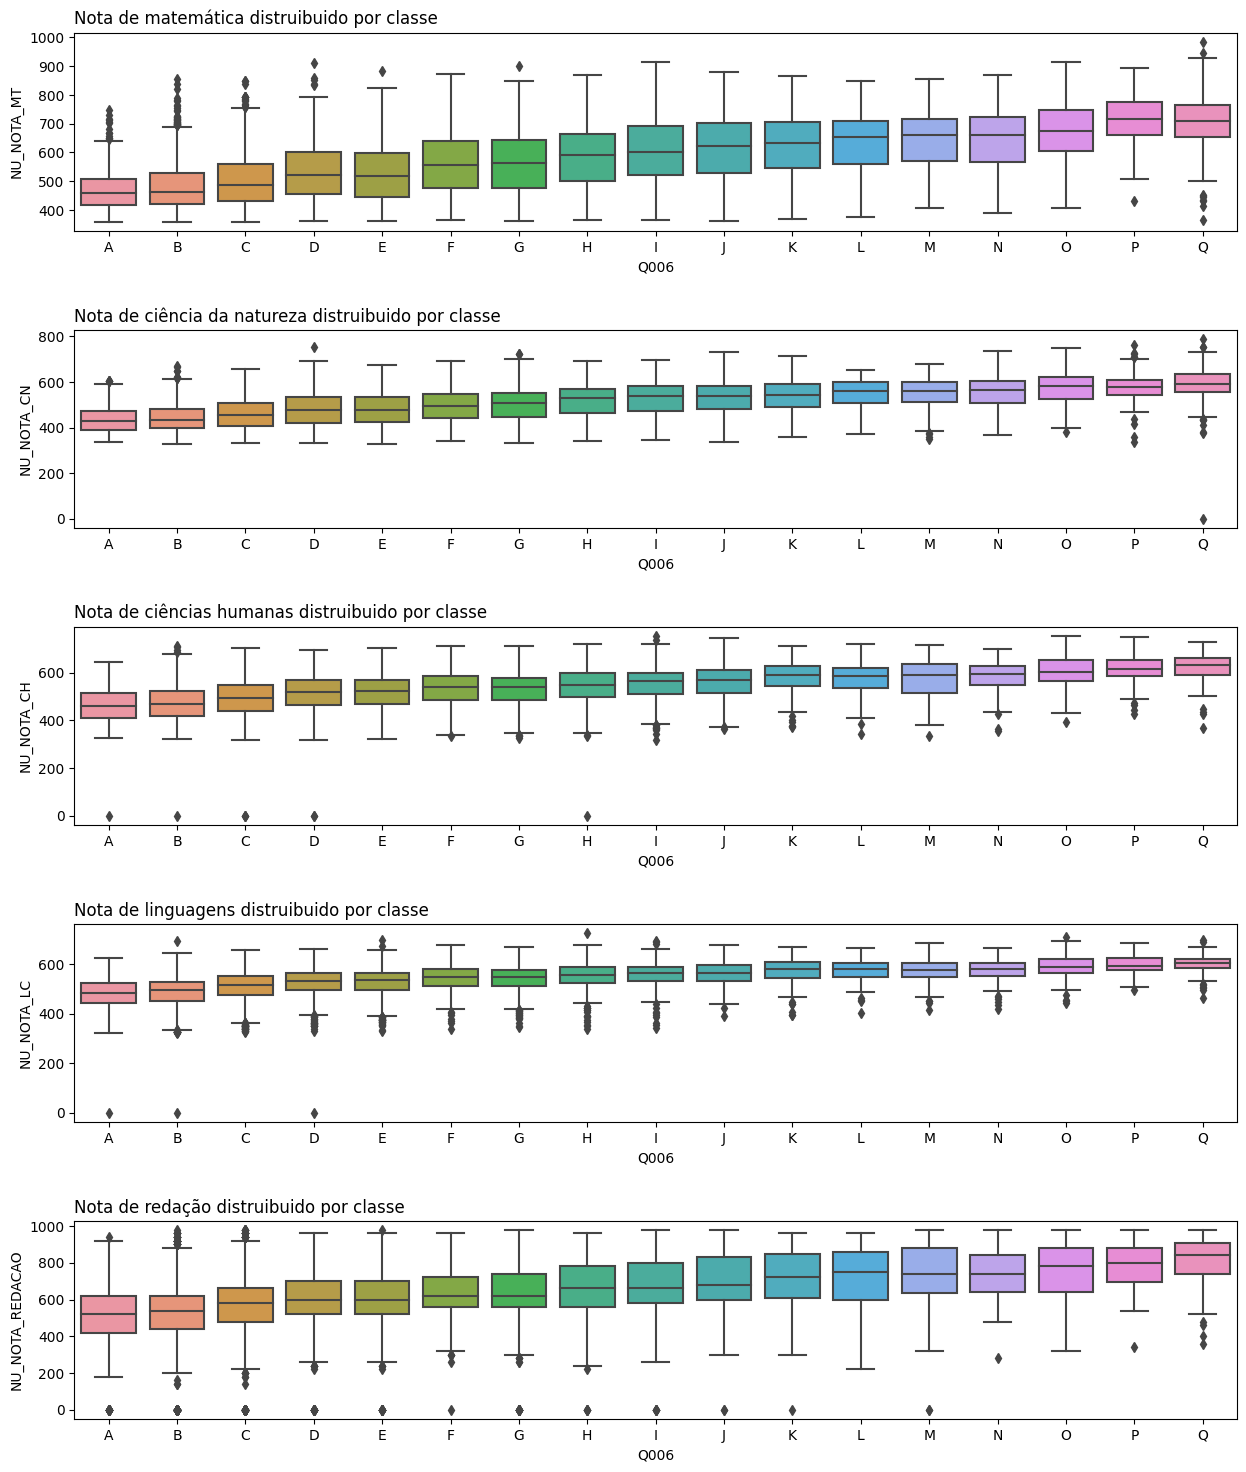

In [131]:
#Criação de gráfico boxplot para analisar a diferença entre as notas
plt.figure( figsize=(15, 18))
plt.subplots_adjust(hspace=0.5)

plt.subplot(5,1,1)
sns.boxplot(data=df_enem_ordenado, x='Q006', y='NU_NOTA_MT')
plt.title('Nota de matemática distruibuido por classe', loc='left')

plt.subplot(5,1,2)
sns.boxplot(data=df_enem_ordenado, x='Q006', y='NU_NOTA_CN')
plt.title('Nota de ciência da natureza distruibuido por classe', loc='left')

plt.subplot(5,1,3)
sns.boxplot(data=df_enem_ordenado, x='Q006', y='NU_NOTA_CH')
plt.title('Nota de ciências humanas distruibuido por classe', loc='left')

plt.subplot(5,1,4)
sns.boxplot(data=df_enem_ordenado, x='Q006', y='NU_NOTA_LC')
plt.title('Nota de linguagens distruibuido por classe', loc='left')

plt.subplot(5,1,5)
sns.boxplot(data=df_enem_ordenado, x='Q006', y='NU_NOTA_REDACAO')
plt.title('Nota de redação distruibuido por classe', loc='left')

Text(0.0, 1.0, 'Nota de redação distruibuido por classe')

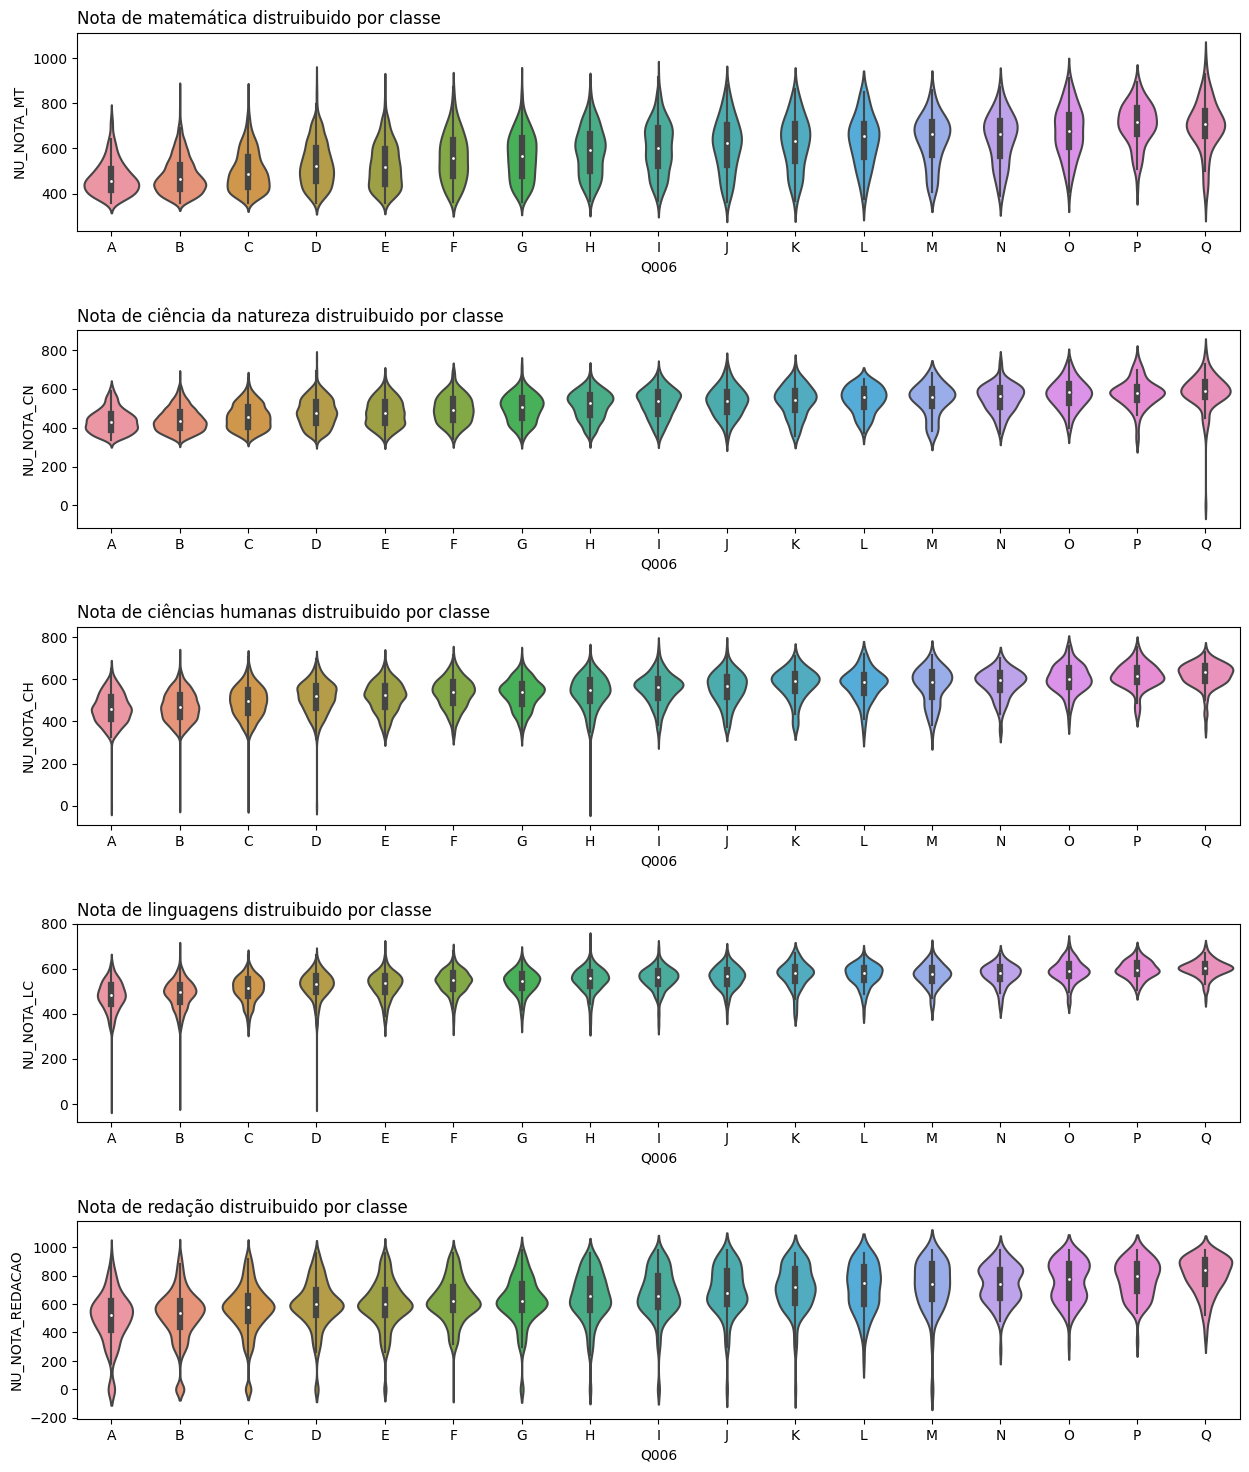

In [132]:
plt.figure( figsize=(15, 18))
plt.subplots_adjust(hspace=0.5)

plt.subplot(5,1,1)
sns.violinplot(data=df_enem_ordenado, x='Q006', y='NU_NOTA_MT')
plt.title('Nota de matemática distruibuido por classe', loc='left')

plt.subplot(5,1,2)
sns.violinplot(data=df_enem_ordenado, x='Q006', y='NU_NOTA_CN')
plt.title('Nota de ciência da natureza distruibuido por classe', loc='left')

plt.subplot(5,1,3)
sns.violinplot(data=df_enem_ordenado, x='Q006', y='NU_NOTA_CH')
plt.title('Nota de ciências humanas distruibuido por classe', loc='left')

plt.subplot(5,1,4)
sns.violinplot(data=df_enem_ordenado, x='Q006', y='NU_NOTA_LC')
plt.title('Nota de linguagens distruibuido por classe', loc='left')

plt.subplot(5,1,5)
sns.violinplot(data=df_enem_ordenado, x='Q006', y='NU_NOTA_REDACAO')
plt.title('Nota de redação distruibuido por classe', loc='left')

### Podemos perceber claramente que a renda familiar está ligada ao desempenho do aluno, isto se deve porque quanto maior a renda de uma família, ela poderá arcar com um maior custo escolar que por sua vez está ligado a qualidade de estrutura e ensino, sem contar com fatores demográficos e biológicos ligado o bem estar de um estudante. 
### Considerando isso, será que podemos inferir que uma região geográfica possui uma maior concentração de renda, comparando a nota entre as regiões?

In [3]:
df_enem2 = pd.read_csv('Dados_Regionais.csv', sep=';')
df_enem2.rename(columns={'Sigla': 'SG_UF_RESIDENCIA'}, inplace = True)
Base_Cruzada = pd.merge( df_enem, df_enem2, on=['SG_UF_RESIDENCIA'], how='outer' )
Base_Cruzada.drop( columns=['Estado', 'Capital'], inplace=True )
Base_Cruzada.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_ESCOLA,Q006,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Região
0,RJ,18,2,C,377.3,366.7,478.8,453.0,280,Sudeste
1,RJ,18,3,C,536.4,363.6,514.1,439.5,560,Sudeste
2,RJ,19,2,B,547.5,551.1,549.1,585.1,840,Sudeste
3,RJ,17,2,G,601.2,652.2,635.6,734.1,640,Sudeste
4,RJ,18,3,I,578.2,562.2,524.0,662.4,600,Sudeste


In [4]:
Base_Cruzada['media_geral'] = Base_Cruzada[['NU_NOTA_CN','NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']].mean(axis=1)
Base_Cruzada_Ord = Base_Cruzada.sort_values(by='SG_UF_RESIDENCIA')

Text(0, 0.5, 'Média geral')

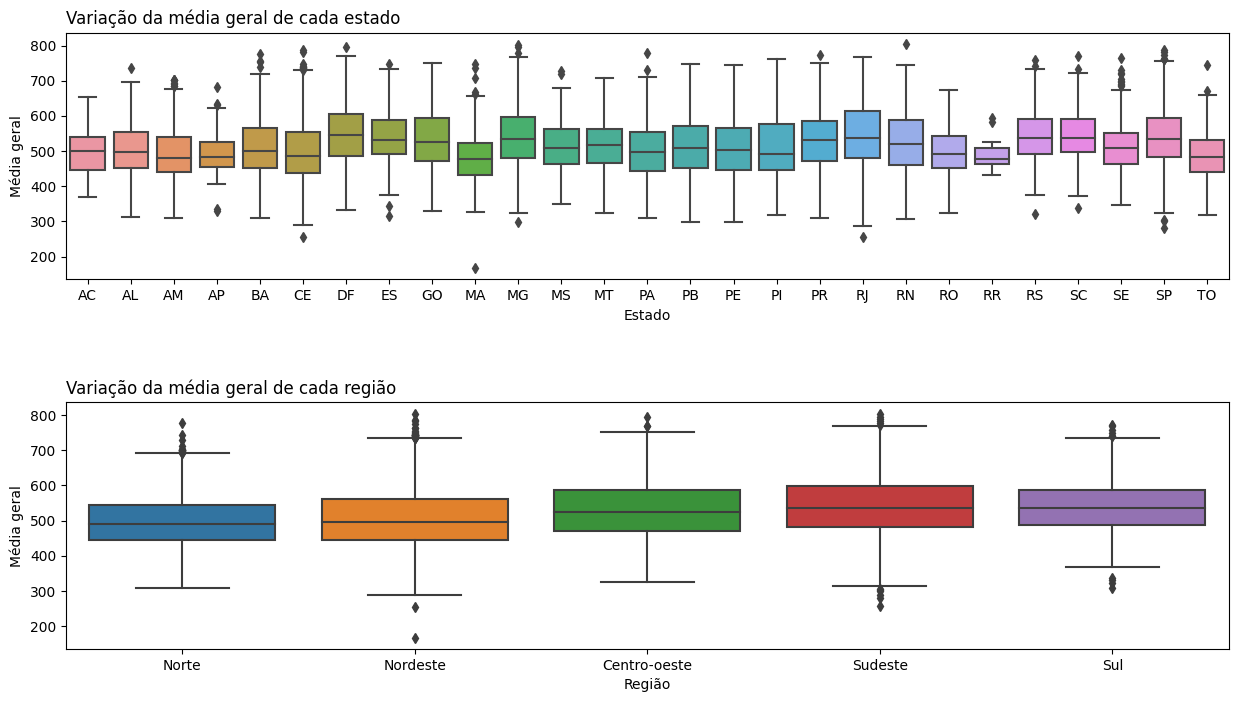

In [129]:
plt.figure( figsize=(15, 8))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2,1,1)
sns.boxplot(data=Base_Cruzada_Ord, x='SG_UF_RESIDENCIA', y='media_geral')
plt.title('Variação da média geral de cada estado', loc='left')
plt.xlabel('Estado')
plt.ylabel('Média geral')

plt.subplot(2,1,2)
sns.boxplot(data=Base_Cruzada_Ord, x='Região', y='media_geral')
plt.title('Variação da média geral de cada região', loc='left')
plt.xlabel('Região')
plt.ylabel('Média geral')

### A difrença entre o desempenho entre as regiões é realmente muito pouca, assim como a diferença entre renda média de cada região também é, como mostra a figura abaixo. Dessa form, podemos sim afirmar que o desempenho dos participantes do Enem, está de certa maneira relacionado a sua renda familiar.

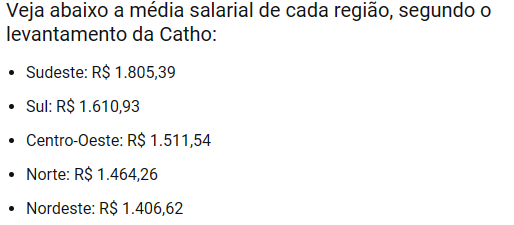

## 2. Seria possível encontrar uma associação das notas com a rede de ensino que um aluno estudou?

In [133]:
Base_Cruzada

,SG_UF_RESIDENCIA,NU_IDADE,TP_ESCOLA,Q006,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Região,media_geral
0,RJ,18,2,C,377.3,366.7,478.8,453.0,280,Sudeste,391.16
1,RJ,18,3,C,536.4,363.6,514.1,439.5,560,Sudeste,482.72
2,RJ,19,2,B,547.5,551.1,549.1,585.1,840,Sudeste,614.56
3,RJ,17,2,G,601.2,652.2,635.6,734.1,640,Sudeste,652.62
4,RJ,18,3,I,578.2,562.2,524.0,662.4,600,Sudeste,585.36
...,...,...,...,...,...,...,...,...,...,...,...
9965,AC,17,2,B,454.4,472.0,384.7,381.0,540,Norte,446.42
9966,AC,20,2,A,434.3,457.9,482.8,485.9,400,Norte,452.18
9967,AC,18,2,C,458.3,410.5,528.0,459.7,640,Norte,499.30
9968,AC,17,2,B,359.6,337.7,469.7,435.4,380,Norte,396.48


In [153]:
#Para efetuar nossa análise iremos trocar os dados de TP_ESCOLA para o seu nome correspondente. 
#Faço isso pois fica mais fácil a visualização
Base_Cruzada["TP_ESCOLA"] = Base_Cruzada["TP_ESCOLA"].replace({"1": "Sem_resposta", "2": "Pública", "3": "Privada", "4": "Exterior"})
Base_Cruzada.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_ESCOLA,Q006,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Região,media_geral
0,RJ,18,2,C,377.3,366.7,478.8,453.0,280,Sudeste,391.16
1,RJ,18,3,C,536.4,363.6,514.1,439.5,560,Sudeste,482.72
2,RJ,19,2,B,547.5,551.1,549.1,585.1,840,Sudeste,614.56
3,RJ,17,2,G,601.2,652.2,635.6,734.1,640,Sudeste,652.62
4,RJ,18,3,I,578.2,562.2,524.0,662.4,600,Sudeste,585.36


In [140]:
Base_Cruzada.groupby('TP_ESCOLA')[['NU_NOTA_CH', 'NU_NOTA_LC']].describe()

NU_NOTA_CH                                                           \
               count        mean        std  min     25%    50%    75%    max   
TP_ESCOLA                                                                       
2             8603.0  496.437766  75.287327  0.0  441.75  499.4  551.8  753.3   
3             1367.0  579.499195  73.409966  0.0  544.95  589.3  628.5  755.5   

          NU_NOTA_LC                                                           
               count        mean        std  min     25%    50%    75%    max  
TP_ESCOLA                                                                      
2             8603.0  512.190468  60.738288  0.0  476.75  518.6  554.9  727.9  
3             1367.0  571.251353  54.398513  0.0  547.40  580.1  605.6  710.2

In [143]:
Base_Cruzada.groupby('TP_ESCOLA')[['NU_NOTA_REDACAO']].describe()

NU_NOTA_REDACAO                                                    \
                    count        mean         std  min    25%    50%    75%   
TP_ESCOLA                                                                     
2                  8603.0  564.033477  177.687632  0.0  480.0  580.0  660.0   
3                  1367.0  745.106072  153.204807  0.0  640.0  760.0  880.0   

                  
             max  
TP_ESCOLA         
2          980.0  
3          980.0

In [144]:
Base_Cruzada.groupby('TP_ESCOLA')[['NU_NOTA_MT', 'NU_NOTA_CN']].describe()

NU_NOTA_MT                                                        \
               count        mean         std    min     25%    50%     75%   
TP_ESCOLA                                                                    
2             8603.0  510.071080   95.707725  359.0  434.25  491.6  575.50   
3             1367.0  639.201317  116.398318  365.8  559.45  650.9  721.15   

                 NU_NOTA_CN                                               \
             max      count        mean        std    min     25%    50%   
TP_ESCOLA                                                                  
2          901.3     8603.0  464.204743  68.854322  327.9  409.45  457.9   
3          985.0     1367.0  551.039356  76.107271    0.0  509.85  562.4   

                         
             75%    max  
TP_ESCOLA                
2          514.4  761.4  
3          599.4  789.9

### Analisando as estatísticas básicas podemos notar que a média de cada nota realmente possuem uma diferença considerável, e que o ensino no qual o participante está matriculado influencia positivamente a futura nota.

Text(0, 0.5, 'Nota da redação')

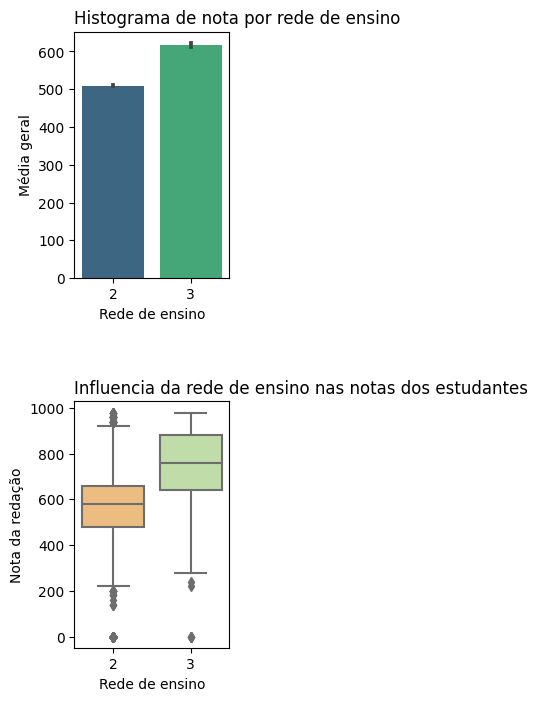

In [25]:
plt.figure( figsize=(2, 8))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2,1,1)
sns.barplot(data=Base_Cruzada, x='TP_ESCOLA', y='media_geral', palette='viridis')
plt.title('Histograma de nota por rede de ensino', loc='left')
plt.xlabel('Rede de ensino')
plt.ylabel('Média geral')




plt.subplot(2,1,2)
sns.boxplot(data=Base_Cruzada_Ord, x='TP_ESCOLA', y='NU_NOTA_REDACAO', palette='Spectral')
plt.title('Influencia da rede de ensino nas notas dos estudantes', loc='left')
plt.xlabel('Rede de ensino')
plt.ylabel('Nota da redação')

## 3. Há relação entre uma nota e outra?
    Iremos analisar se alunos com uma nota muito acima da média em uma matéria também terá em outra.

Text(0, 0.5, 'Nota de redação')

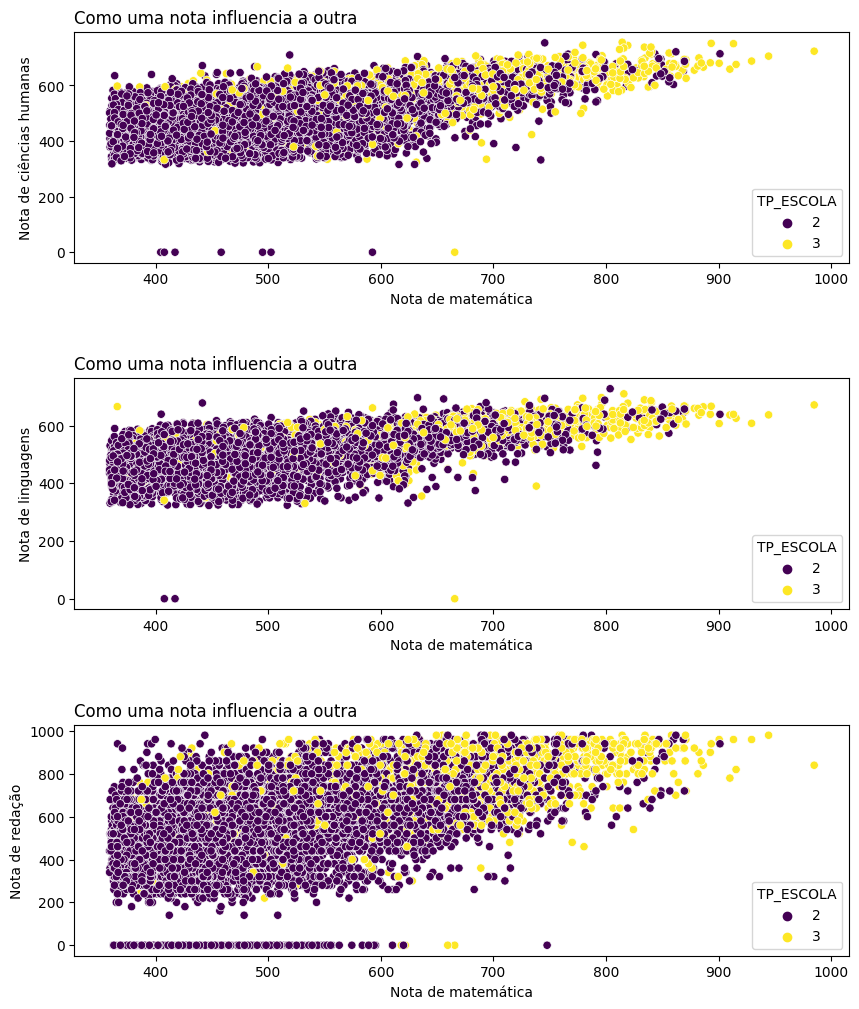

In [38]:
# ANALISAR COMO AS NOTAS DOS ALUNOS SE COMPORTAM
# QUEM É UM ALUNO MUITO BOM EM UMA MATÉRIA TAMBÉM SErÁ NA OUTRA?
plt.figure( figsize=(10, 12))
plt.subplots_adjust(hspace=0.5)

plt.subplot(3,1,1)
sns.scatterplot(data=Base_Cruzada, x='NU_NOTA_MT', y='NU_NOTA_CH', hue='TP_ESCOLA', palette="viridis")
plt.title('Como uma nota influencia a outra', loc='left')
plt.xlabel('Nota de matemática')
plt.ylabel('Nota de ciências humanas')

plt.subplot(3,1,2)
sns.scatterplot(data=Base_Cruzada, x='NU_NOTA_MT', y='NU_NOTA_LC', hue='TP_ESCOLA', palette="viridis")
plt.title('Como uma nota influencia a outra', loc='left')
plt.xlabel('Nota de matemática')
plt.ylabel('Nota de linguagens')

plt.subplot(3,1,3)
sns.scatterplot(data=Base_Cruzada, x='NU_NOTA_MT', y='NU_NOTA_REDACAO', hue='TP_ESCOLA', palette="viridis")
plt.title('Como uma nota influencia a outra', loc='left')
plt.xlabel('Nota de matemática')
plt.ylabel('Nota de redação')

### Podemos perceber com a plotagem de alguns gráficos que uma nota está sim influenciando a outra, isto é: Um aluno com notas excelentes em matemática também terá, provavelmente, uma ótima nota no restante.

## 4. Que região demográfica brasileira possui melhor desempenho? 
        - Que região apresenta melhor desempenho em redação?
        - Qual região apresenta melhor desempenho em matemática?
        - Regiãos x média do dia 2 

### 4.1 Que região apresenta melhor desempenho em redação?

In [41]:
Base_Cruzada.groupby('Região')['NU_NOTA_REDACAO'].mean()

Região
Centro-oeste    607.335812
Nordeste        567.858387
Norte           561.027397
Sudeste         606.448295
Sul             603.574542
Name: NU_NOTA_REDACAO, dtype: float64

<AxesSubplot: ylabel='Density'>

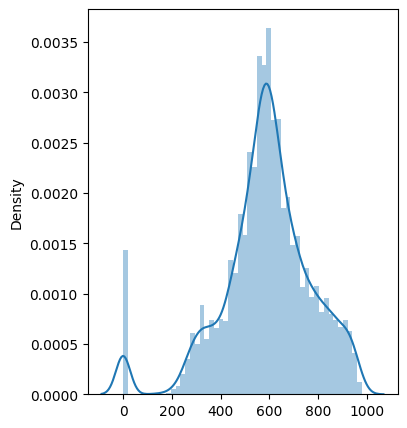

In [66]:
plt.figure( figsize=(4, 5))

sns.distplot(x=Base_Cruzada['NU_NOTA_REDACAO'])

<AxesSubplot: xlabel='NU_NOTA_REDACAO', ylabel='Count'>

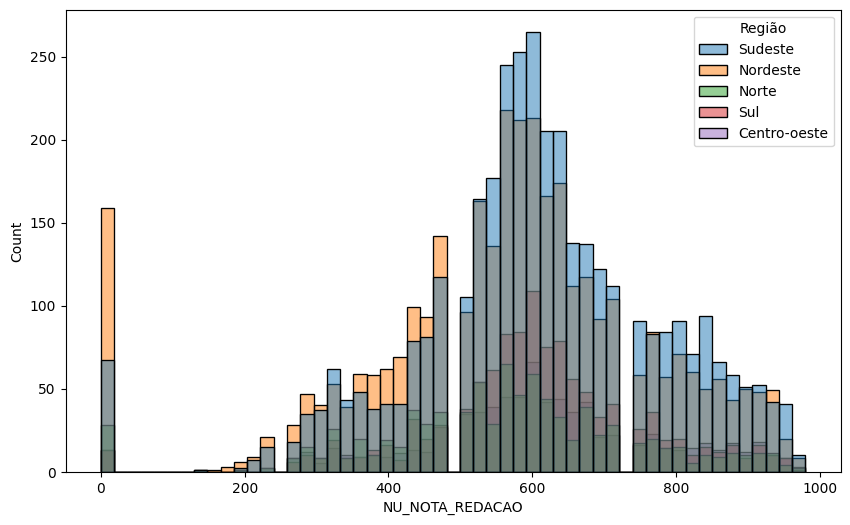

In [68]:
plt.figure( figsize=(10, 6))

sns.histplot(data=Base_Cruzada, x='NU_NOTA_REDACAO', hue='Região')

### 4.2 Que região apresenta melhor desempenho em matemática?

In [69]:
Base_Cruzada.groupby('Região')['NU_NOTA_MT'].mean()

Região
Centro-oeste    533.047955
Nordeste        506.999071
Norte           492.387671
Sudeste         548.343449
Sul             547.278901
Name: NU_NOTA_MT, dtype: float64

<AxesSubplot: xlabel='NU_NOTA_MT', ylabel='Count'>

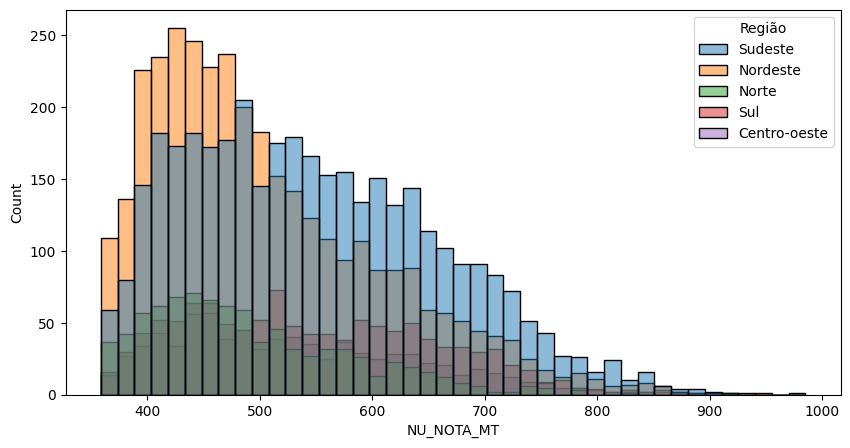

In [71]:
plt.figure( figsize=(10, 5))

sns.histplot(data=Base_Cruzada, x='NU_NOTA_MT', hue='Região')

Text(0, 0.5, 'Nota de matemática')

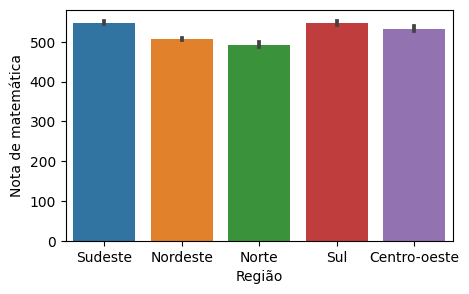

In [84]:
plt.figure( figsize=(5, 3))

sns.barplot(data=Base_Cruzada,x='Região', y='NU_NOTA_MT')
plt.ylabel('Nota de matemática')

## 4.3 Região x média do dia 2 

In [88]:
Base_Cruzada['média_d2'] = Base_Cruzada[['NU_NOTA_MT', 'NU_NOTA_CN']].mean(axis=1)
Base_Cruzada

,SG_UF_RESIDENCIA,NU_IDADE,TP_ESCOLA,Q006,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Região,media_geral,média_d2
0,RJ,18,2,C,377.3,366.7,478.8,453.0,280,Sudeste,391.16,415.15
1,RJ,18,3,C,536.4,363.6,514.1,439.5,560,Sudeste,482.72,487.95
2,RJ,19,2,B,547.5,551.1,549.1,585.1,840,Sudeste,614.56,566.30
3,RJ,17,2,G,601.2,652.2,635.6,734.1,640,Sudeste,652.62,667.65
4,RJ,18,3,I,578.2,562.2,524.0,662.4,600,Sudeste,585.36,620.30
...,...,...,...,...,...,...,...,...,...,...,...,...
9965,AC,17,2,B,454.4,472.0,384.7,381.0,540,Norte,446.42,417.70
9966,AC,20,2,A,434.3,457.9,482.8,485.9,400,Norte,452.18,460.10
9967,AC,18,2,C,458.3,410.5,528.0,459.7,640,Norte,499.30,459.00
9968,AC,17,2,B,359.6,337.7,469.7,435.4,380,Norte,396.48,397.50


In [89]:
Base_Cruzada.groupby('Região')['média_d2'].mean()

Região
Centro-oeste    508.247398
Nordeste        483.313755
Norte           473.976941
Sudeste         519.896386
Sul             517.019224
Name: média_d2, dtype: float64

## 5. A idade realmente importa para um bom desempenho dos participantes?

In [90]:
df_enem.groupby('NU_IDADE')[['NU_NOTA_CN','NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].mean()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_IDADE,,,,,
14,368.000000,445.100000,493.800000,421.500000,520.000000
15,537.560000,562.240000,548.380000,676.680000,696.000000
16,479.642105,510.466029,526.657416,541.827751,635.980861
17,485.509255,518.874426,530.448447,543.826574,611.055319
18,473.834320,506.171573,518.437513,522.023858,587.196262
19,453.442857,478.003448,494.215025,491.670443,523.054187
20,436.488053,459.013274,472.527434,466.998230,463.274336
21,420.862319,443.421739,457.563768,452.955072,436.231884
22,419.692593,442.970370,461.685185,448.855556,420.740741


In [93]:
df_enem['media_geral'] = df_enem[['NU_NOTA_CN','NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].mean(axis=1)
                                                                                                               

In [120]:
df_enem.groupby('NU_IDADE')['media_geral'].mean()

NU_IDADE
14    449.680000
15    604.172000
16    538.914833
17    537.942804
18    521.532705
19    488.077192
20    459.660265
21    442.206957
22    438.788889
23    423.353684
24    439.463636
25    423.535000
26    444.365000
27    444.113333
28    438.013333
29    502.140000
30    422.726667
31    484.720000
32    508.500000
33    427.110000
35    440.780000
36    458.340000
37    415.180000
38    329.240000
39    450.930000
40    425.390000
42    438.080000
44    403.780000
45    438.030000
52    534.400000
Name: media_geral, dtype: float64

<AxesSubplot: ylabel='Density'>

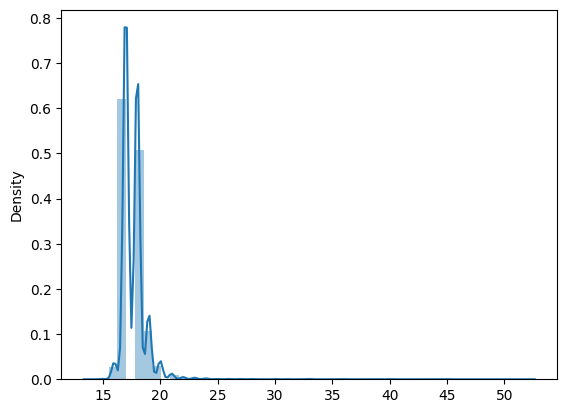

In [122]:
sns.distplot(x=df_enem['NU_IDADE'])

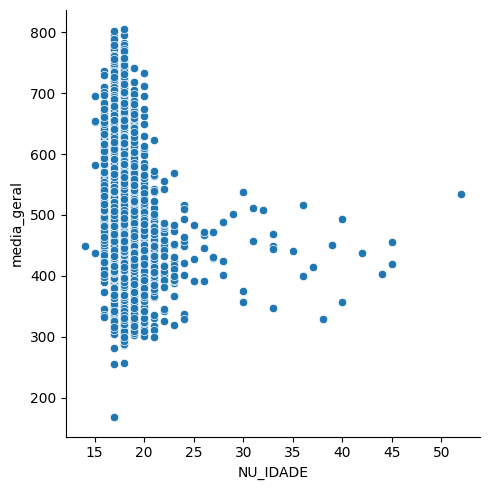

In [106]:
sns.relplot(df_enem, x=df_enem['NU_IDADE'], y=df_enem['media_geral'])

### Podemos notar que essa divisão não seria correta, a maioria dos alunos está  situado entre 16 e 18 anos e pouco prova nossa hipotésem, na verdade, nesse grupo temos diferente realidades como já provados anteriormente.

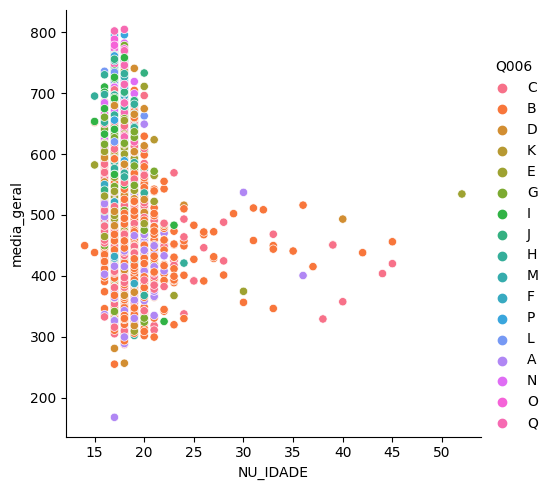

In [130]:
sns.relplot(df_enem, x=df_enem['NU_IDADE'], y=df_enem['media_geral'], hue=('Q006'))